<p style="font-size:32px;text-align:center"> <b> DISASTER OR HOAX?? Predicting Disaster tweets using NLP </b> </p>

<p><b>Introduction :</b></p>
During the 60' and 70's radios were the top source of news and entertainment, this changed in the 
80's and Television(TV) became the top source of news. Eventually in the 2000's computers , 
escpecially social networking sites Facebook and Twitter became source of news and 
information. This gets news about disasters spread quickly around the world, which eventually 
helps in people affected by the disaster get immediate assistance

<p><b>Business problem :</b></p>
I aim to find out if a tweet describes a real disaster or not, using Natural language processing
(NLP) techniques.

<p><b>Data Information :</b></p>
The data was given by applied ai and downloaded from Kaggle. It consists of training data in
train.csv , test data in test.csv file.

In [1]:
import numpy as np 
import pandas as pd

<b> Loading and Reading the train.csv </b>

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
df_train.shape

(7613, 5)

<b> OBSERVATIONS </b>

The train dataset has 7613 rows and 5 columns

<b>Data set column analysis:</b>
<li><b>id :</b> a unique id number for each tweet</li>
<li><b>keyword :</b> Important key word from the tweet text. This could be blank.</li>
<li><b>location :</b> The location from which tweet was sent from. This could also be blank.</li>
<li><b>text :</b> The text in tweet which describes the event</li>
<li><b>target:</b> This tells whether a tweet is about a real disaster "1" or not "0" </li>

In [4]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


<b> OBSERVATIONS </b>
<li>There are no null values in "id", "text" and "target" collumns.</li>
<li>There are 61 null values in keyword collumn.</li>
<li>There are 2533 null values in location collumn.</li>

<b> Loading and Reading the test.csv </b>

In [6]:
df_test = pd.read_csv("test.csv")
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
df_test.shape

(3263, 4)

<b> OBSERVATIONS </b>

<li>The train dataset has 3263 rows and 4 columns.</li>
<li>The collumns are same as the train data, but do not have the target collumn.</li>

In [8]:
df_test.describe()

,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


<b> OBSERVATIONS </b>
<li>There are no null values in "id" and "text" collumns.</li>
<li>There are 26 null values in keyword collumn.</li>
<li>There are 1105 null values in location collumn.</li>

<b>Conclusion 1: </b>
Since there is no target collumn in test.csv, we will just use the train.csv and divide it into 80-20 percent of train and test respectively.

In [10]:
import matplotlib.pyplot as plt

<b> Source : Personal cancer diagnosis project </b>

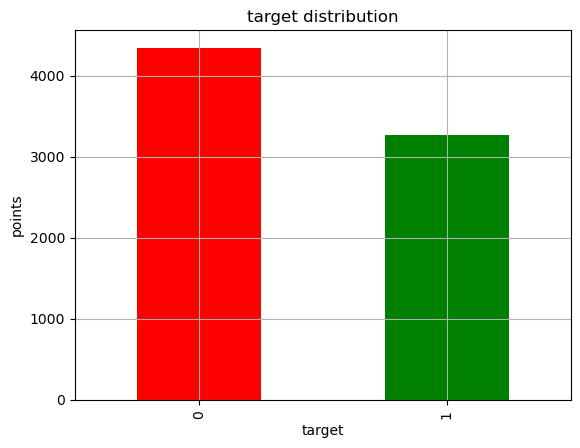

In [11]:
target_distribution = df_train['target'].value_counts().sort_index()
my_colors = ['r', 'g']
target_distribution.plot(kind='bar',color=my_colors)
plt.xlabel('target')
plt.ylabel('points')
plt.title('target distribution')
plt.grid()
plt.show()

In [12]:
df_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<b> Observation </b>
<li>There are 4342 instances where the target is 0</li>
<li>There are 3271 instances where the target is 1</li>
<li>The data looks balanced</li>


Shifting my focus to Check if there are any duplicates in the df_train dataframe.

<b> Checking for duplicates </b>

In [13]:
duplicate = df_train[df_train.duplicated('text')]
duplicate

,id,keyword,location,text,target
48,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
115,165,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
119,172,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0
164,238,airplane%20accident,NaN,Experts in France begin examining airplane deb...,1
624,898,bioterrorism,NaN,To fight bioterrorism sir.,0
...,...,...,...,...,...
7600,10855,NaN,NaN,Evacuation order lifted for town of Roosevelt:...,1
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


<b>Observation</b>
<p>There are 110 rows which are duplicates, but removing them would not be the right thing to do. As this could be from different user wanting the same help from different places. Example  In case of an earthquake ,two people may require debris clearing assistance from same place in nearby region </p>

In [14]:
print(df_train['keyword'].value_counts())

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64


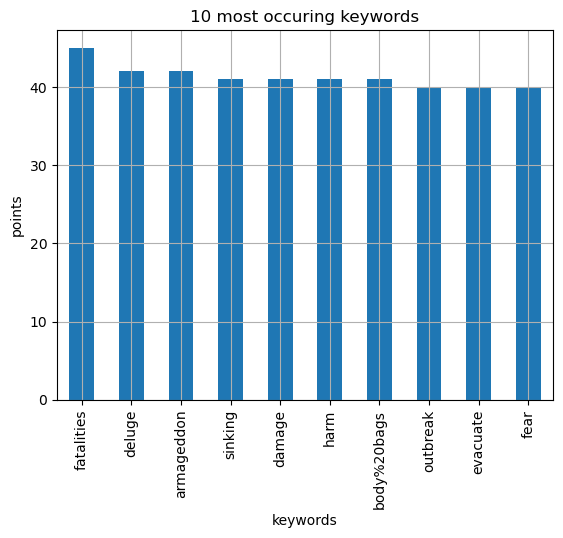

In [15]:
target_distribution = df_train['keyword'].value_counts()[:10]

target_distribution.plot(kind='bar')
plt.xlabel('keywords')
plt.ylabel('points')
plt.title('10 most occuring keywords')
plt.grid()
plt.show()

<b>10 Least occuring key words </b>

In [16]:
 df_train['keyword'].value_counts()[-10:]

volcano                  27
battle                   26
bush%20fires             25
war%20zone               24
rescue                   22
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, dtype: int64

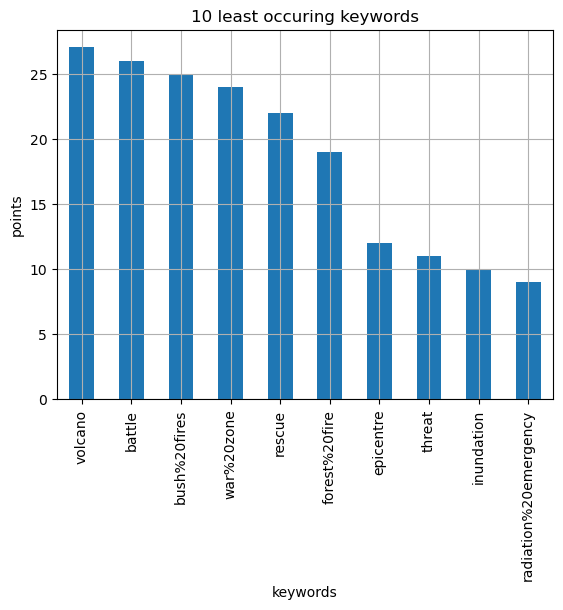

In [17]:
target_distribution = df_train['keyword'].value_counts()[-10:]

target_distribution.plot(kind='bar')
plt.xlabel('keywords')
plt.ylabel('points')
plt.title('10 least occuring keywords')
plt.grid()
plt.show()

<b>Observation </b>
<li>There are 221 keywords</li>
<li>"Fatalities" is the most used keyword , followed by "deluge" and "armageddon"</li>

In [18]:
df_train.groupby('keyword')['target'].value_counts()

keyword     target
ablaze      0         23
            1         13
accident    1         24
            0         11
aftershock  0         34
                      ..
wreck       0         30
            1          7
wreckage    1         39
wrecked     0         36
            1          3
Name: target, Length: 438, dtype: int64

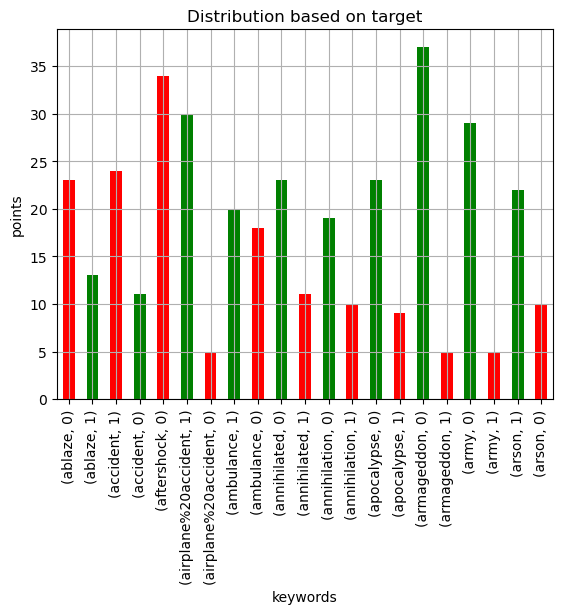

In [19]:
target_distribution = df_train.groupby('keyword')['target'].value_counts()[:21]
my_colors = ['r', 'g']
target_distribution.plot(kind='bar' ,color=my_colors)
plt.xlabel('keywords')
plt.ylabel('points')
plt.title('Distribution based on target')
plt.grid()
plt.show()

<b> Analysing words in Real disaster tweets only</b>

In [20]:
true_df = df_train.loc[df_train['target'] == 1].copy()

In [21]:
true_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [22]:
true_df['keyword'].value_counts()[-10:]

blew%20up      2
inundation     2
threat         2
screaming      2
body%20bags    1
blazing        1
epicentre      1
body%20bag     1
electrocute    1
ruin           1
Name: keyword, dtype: int64

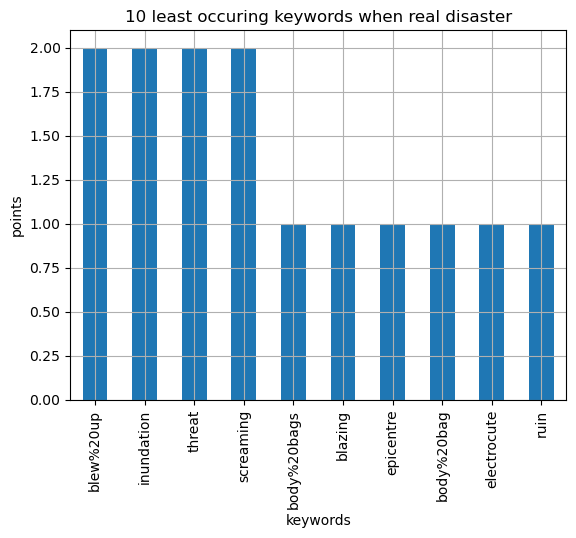

In [23]:
target_distribution = true_df['keyword'].value_counts()[-10:]

target_distribution.plot(kind='bar')
plt.xlabel('keywords')
plt.ylabel('points')
plt.title('10 least occuring keywords when real disaster')
plt.grid()
plt.show()

In [24]:
true_df['keyword'].value_counts()[:10]

derailment           39
wreckage             39
outbreak             39
debris               37
oil%20spill          37
typhoon              37
evacuated            32
suicide%20bombing    32
rescuers             32
suicide%20bomb       32
Name: keyword, dtype: int64

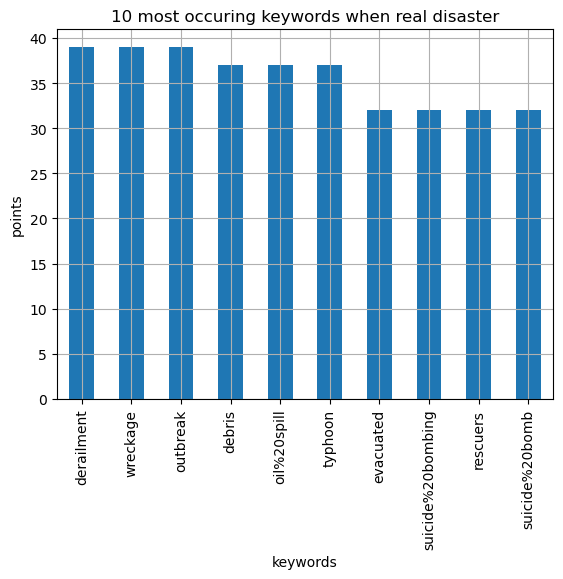

In [25]:
target_distribution = true_df['keyword'].value_counts()[:10]

target_distribution.plot(kind='bar')
plt.xlabel('keywords')
plt.ylabel('points')
plt.title('10 most occuring keywords when real disaster')
plt.grid()
plt.show()

<b> Analysing words in Hoax disaster tweets only</b>

In [26]:
hoax_df = df_train.loc[df_train['target'] == 0].copy()
hoax_df

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7587,10841,NaN,NaN,Sirens everywhere!,0


In [27]:
hoax_df['keyword'].value_counts()[-10:]

forest%20fire         4
suicide%20bomb        3
rescuers              3
nuclear%20disaster    3
bombing               2
typhoon               1
suicide%20bombing     1
suicide%20bomber      1
outbreak              1
oil%20spill           1
Name: keyword, dtype: int64

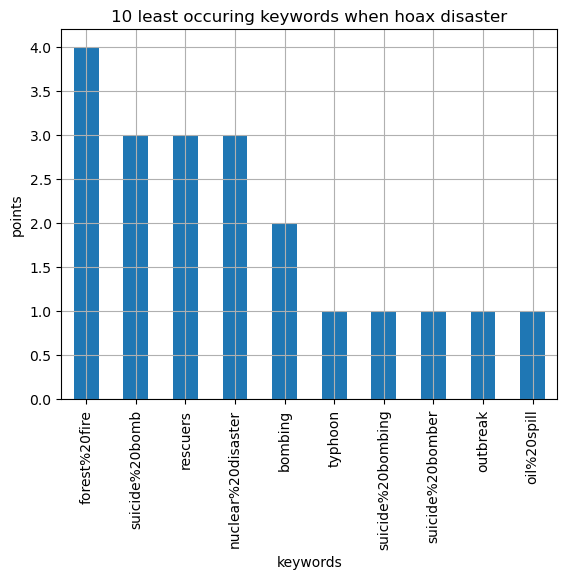

In [28]:
target_distribution = hoax_df['keyword'].value_counts()[-10:]

target_distribution.plot(kind='bar')
plt.xlabel('keywords')
plt.ylabel('points')
plt.title('10 least occuring keywords when hoax disaster')
plt.grid()
plt.show()

In [29]:
hoax_df['keyword'].value_counts()[:10]

body%20bags    40
harm           37
armageddon     37
wrecked        36
ruin           36
deluge         36
explode        35
twister        35
fear           35
siren          35
Name: keyword, dtype: int64

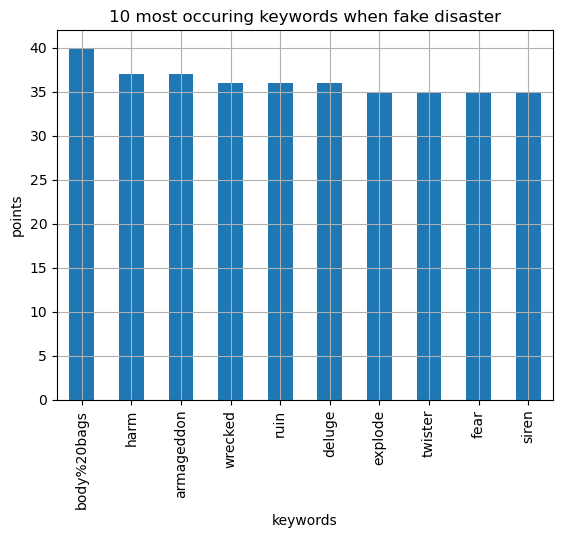

In [30]:
target_distribution = hoax_df['keyword'].value_counts()[:10]

target_distribution.plot(kind='bar')
plt.xlabel('keywords')
plt.ylabel('points')
plt.title('10 most occuring keywords when fake disaster')
plt.grid()
plt.show()

<b> Analysis on Word Count </b>

In [31]:
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))

In [32]:
df_train

,id,keyword,location,text,target,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,20
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,19


In [33]:
df_train["word_count"].mean()

14.903585971364771

<b> Observation : </b>The mean overall word count is 14.903

In [34]:
hoax_df['word_count'] = hoax_df['text'].apply(lambda x: len(str(x).split()))
hoax_df["word_count"].mean()

14.704744357438969

<b> Observation : </b>The mean hoax disaster word count is 14.704

In [35]:
true_df['word_count'] = true_df['text'].apply(lambda x: len(str(x).split()))
true_df["word_count"].mean()

15.167532864567411

<b> Observation : </b>The mean True disaster word count is 15.167

<b>Conclusion on Word count mean :</b> Since the word count of overall, true and hoax disaster tweets are around 15, nothing can be said about it.

<b> Source:==> </b>Word cloud from Quora question pair similarity assignment

In [36]:
from wordcloud import WordCloud

In [37]:
words = df_train["text"].values

Word Cloud Total text


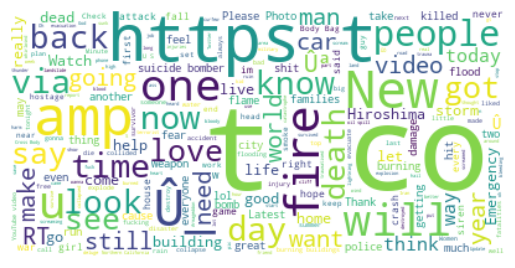

In [38]:
wc = WordCloud(background_color="white", max_words=len(words))
wc.generate(" ".join(words))
print ("Word Cloud Total text")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud True disaster text


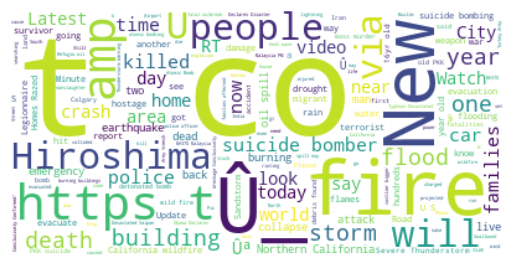

In [39]:
words = true_df["text"].values
wc = WordCloud(background_color="white", max_words=len(words))
wc.generate(" ".join(words))
print ("Word Cloud True disaster text")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud hoax disaster text


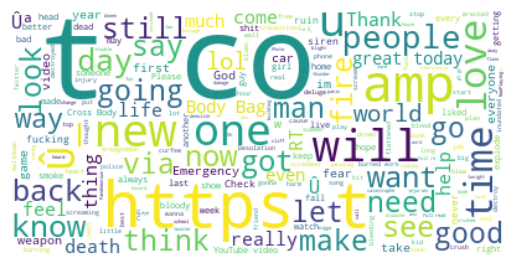

In [40]:
words = hoax_df["text"].values
wc = WordCloud(background_color="white", max_words=len(words))
wc.generate(" ".join(words))
print ("Word Cloud hoax disaster text")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<b> Observation </b>
In all the three word cloud certain words like "https" , "co", "U^" and "t" are seen as some of the most occuring words. This means we will have to clean the data of https and and html tags etc during data cleaning

<b> Removing Stop words and then checking the top words </b>

In [41]:
from wordcloud import STOPWORDS

Word Cloud Total text


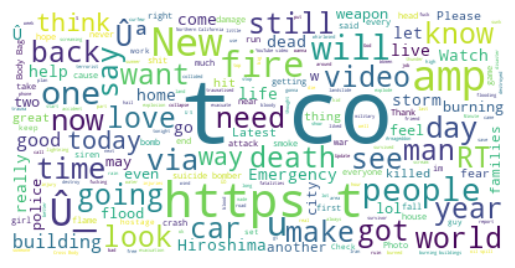

In [42]:
stopwords = set(STOPWORDS)
words = df_train["text"].values
wc = WordCloud(background_color="white",stopwords = stopwords, max_words=len(words))
wc.generate(" ".join(words))
print ("Word Cloud Total text")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud True disaster text


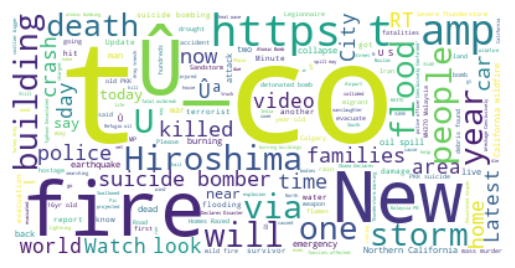

In [43]:
words = true_df["text"].values
wc = WordCloud(background_color="white",stopwords = stopwords, max_words=len(words))
wc.generate(" ".join(words))
print ("Word Cloud True disaster text")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud hoax disaster text


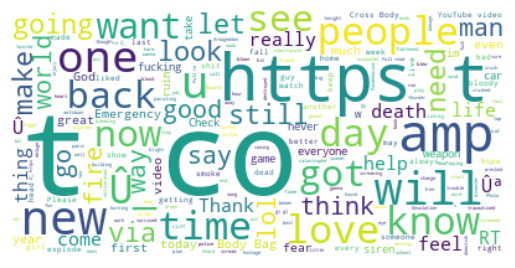

In [44]:
words = hoax_df["text"].values
wc = WordCloud(background_color="white",stopwords = stopwords, max_words=len(words))
wc.generate(" ".join(words))
print ("Word Cloud hoax disaster text")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<b> Observation </b>

<li> Some basic stop words are removed but words like co, https are still present and will require cleaning </li>

# Data-Preprocessing

First I will handle the null values in location and keywords.

Source :==>> https://medium.com/geekculture/dealing-with-null-values-in-pandas-dataframe-1a67854fe834#:~:text=Most%20commonly%20used%20function%20on,where%20all%20values%20are%20NaN%20.

In [45]:
df_train_2 = df_train.copy()

In [46]:
df_train_2['keyword'] = df_train_2['keyword'].fillna('nokeyword')
df_train_2.head()

,id,keyword,location,text,target,word_count
0,1,nokeyword,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,nokeyword,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,nokeyword,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,nokeyword,NaN,"13,000 people receive #wildfires evacuation or...",1,8
4,7,nokeyword,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16


In [47]:
df_train_2['location'] = df_train_2['location'].fillna('nolocation')
df_train_2.head()

,id,keyword,location,text,target,word_count
0,1,nokeyword,nolocation,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,nokeyword,nolocation,Forest fire near La Ronge Sask. Canada,1,7
2,5,nokeyword,nolocation,All residents asked to 'shelter in place' are ...,1,22
3,6,nokeyword,nolocation,"13,000 people receive #wildfires evacuation or...",1,8
4,7,nokeyword,nolocation,Just got sent this photo from Ruby #Alaska as ...,1,16


In [48]:
df_train_2.tail()

,id,keyword,location,text,target,word_count
7608,10869,nokeyword,nolocation,Two giant cranes holding a bridge collapse int...,1,11
7609,10870,nokeyword,nolocation,@aria_ahrary @TheTawniest The out of control w...,1,20
7610,10871,nokeyword,nolocation,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8
7611,10872,nokeyword,nolocation,Police investigating after an e-bike collided ...,1,19
7612,10873,nokeyword,nolocation,The Latest: More Homes Razed by Northern Calif...,1,13


<b> The null location have been filled, so we can avoid null errors later if we decide to use the respective columns </b>

<b> Expanding English language contractions in Python </b>

Source :== >>https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

In [49]:
import re

def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"\'I'm", "I am", phrase)
    phrase = re.sub(r"I\'ve", "I have", phrase)
    phrase = re.sub(r"isn\'t", "is not", phrase)
    phrase = re.sub(r"we\'ll", "we will", phrase)
    phrase = re.sub(r"we\'re", "we are", phrase)
    phrase = re.sub(r"we\'ve", "we have", phrase)
    phrase = re.sub(r"weren\'t", "were not", phrase)
    phrase = re.sub(r"quake", "earthquake", phrase)
    phrase = re.sub(r"nado", "tornado", phrase)
    return phrase


<b> Data Preprocessing steps </b>
<li> Remove html tags what were seen in word cloud Source :==>> https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element </li>
<li> Remove special charecters Source :==>> #remove special character: https://stackoverflow.com/a/5843547/4084039 </li>
<li> Remove words with numbers in text Source :==>> #remove words with numbers python: https://stackoverflow.com/a/18082370/4084039 </li>
<li> Remove the stop words using wordcloud stopwords </li>
<li> Converting all the letters in lowercase so tokenizer does not think they are to different words </li>
<li> Source :==>> Applied AI Amazon fine food reviews Case studies </li>

In [50]:
from bs4 import BeautifulSoup
from tqdm import tqdm
preprocessed_tweets = []
for sentance in tqdm(df_train_2['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_tweets.append(sentance.strip())

  0%|                                                                                         | 0/7613 [00:00<?, ?it/s]C:\Users\ADMIN\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████| 7613/7613 [00:02<00:00, 3481.37it/s]


In [51]:
print(len(preprocessed_tweets))
preprocessed_tweets[1]

7613


'forest fire near la ronge sask canada'

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
Y = df_train_2['target'].values

In [105]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_tweets, Y, stratify=df_train_2['target'], test_size=0.20) 

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
import warnings
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import math

<b> Using basic bow countvectorizer for baseline model </b>

In [107]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train) 
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)
train_auc = []

In [129]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler(with_mean=False)
X_train_bow = scalar.fit_transform(X_train_bow)
X_test_bow= scalar.transform(X_test_bow)

### Baseline Model : Naive Bayes

<li> For text classification problems like spam detection Naive Bayes is used as a baseline model and benchmark </li>
<li> Naive Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems. </li>

<b> P(A|B) = (P(B|A)P(A))/P(B) <b>
<li>P(A|B) is Posterior probability</li>
<li>P(B|A) is Likelihood probability</li>
<li>P(A) and P(B) are the probabilities of observing A and B respectively without any given conditions</li>

In [108]:
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

parameters = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

mnb = MultinomialNB(class_prior= [0.5,0.5])
clf = GridSearchCV(mnb, parameters, cv=3, scoring='roc_auc')
clf.fit(X_train_bow, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=[0.5, 0.5],
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [109]:
print(clf.best_estimator_)

MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=True)


In [110]:
best_alpha_values = 1
mnb = MultinomialNB(alpha = best_alpha_values,class_prior= [0.5,0.5])
mnb.fit(X_train_bow, y_train)

MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=True)

In [111]:
ypred = mnb.predict(X_test_bow)

In [112]:
ypred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [113]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

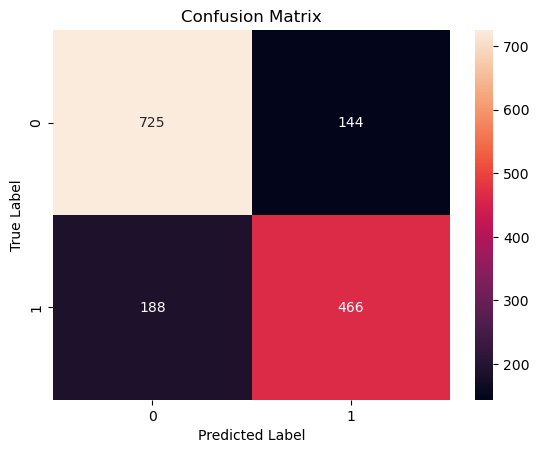

In [114]:
conf_mat = confusion_matrix(y_test,ypred)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [115]:
f1_score(y_test, ypred)

0.7373417721518988

<b> Observation : With the baseline NAIVE BAYES model we get an F1 SCORE of 0.7261 </b>

<b> LOGISTIC REGRESSION </b>

Using l1 regularization

In [116]:
from sklearn.linear_model import LogisticRegression


In [117]:
C=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

clf = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)

clf.fit(X_train_bow, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [118]:
print(clf.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [119]:
lor=LogisticRegression(penalty='l1',C=1,solver='liblinear')
lor.fit(X_train_bow, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
ypred = lor.predict(X_test_bow)

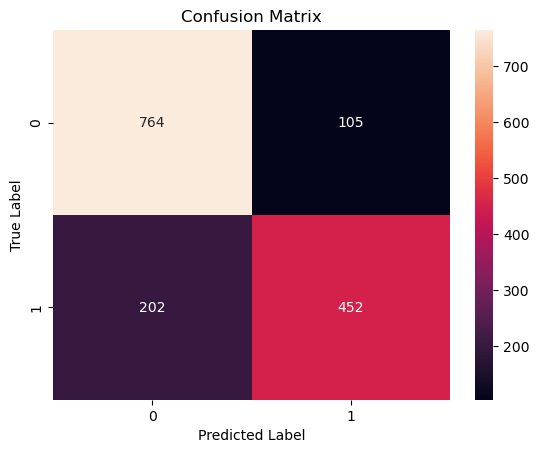

In [121]:
conf_mat = confusion_matrix(y_test,ypred)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [122]:
f1_score(y_test, ypred)

0.7464905037159372

In [123]:
warnings.filterwarnings("ignore")

Using l2 regluarization

In [130]:
C=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

clf = GridSearchCV(LogisticRegression(penalty='l2'), tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
clf.fit(X_train_bow, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [131]:
print(clf.best_estimator_)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [132]:
lor=LogisticRegression(penalty='l2',C=0.0001)
lor.fit(X_train_bow, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
ypred = lor.predict(X_test_bow)

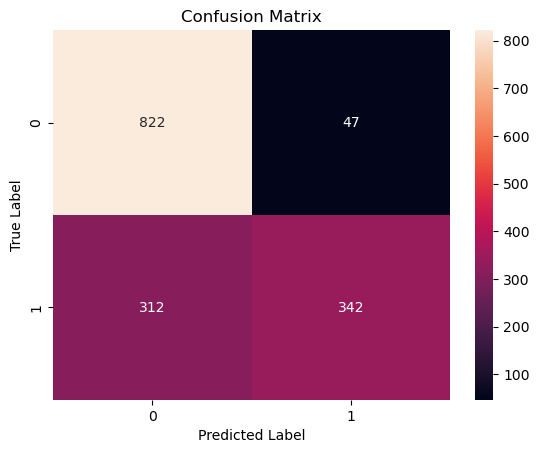

0.6558005752636625


In [134]:
conf_mat = confusion_matrix(y_test,ypred)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print(f1_score(y_test, ypred))

### SVM

In [135]:
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier

In [136]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)
train_auc = []

In [137]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler(with_mean=False)
X_train_bow = scalar.fit_transform(X_train_bow)
X_test_bow= scalar.transform(X_test_bow)

In [138]:
alpha=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters = [{'alpha': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
clf = GridSearchCV(SGDClassifier(loss='hinge'), tuned_parameters, scoring = 'roc_auc', cv=3,return_train_score=True)
clf.fit(X_train_bow, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [139]:
print(clf.best_estimator_)

SGDClassifier(alpha=100, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [140]:
from sklearn.metrics import roc_curve, auc
sg=SGDClassifier(alpha=100,loss='hinge')
sgd =sg.fit(X_train_bow, y_train)


In [141]:
ypred = sgd.predict(X_test_bow)

In [142]:
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

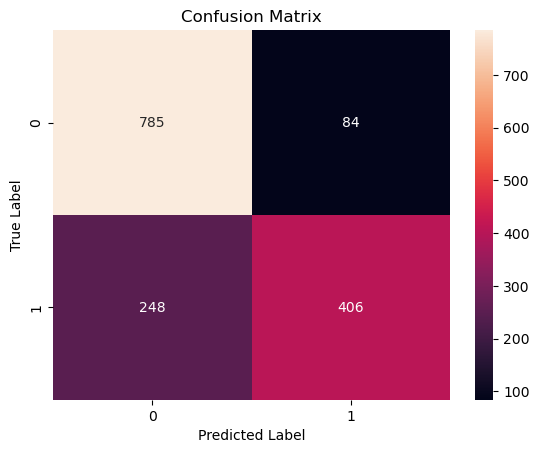

In [143]:
conf_mat = confusion_matrix(y_test,ypred)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [144]:
f1_score(y_test, ypred)

0.7097902097902098

### TFIDF VECTORIZER

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [178]:
Y = df_train_2['target'].values
X = preprocessed_tweets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_tweets, Y, stratify=df_train_2['target'], test_size=0.20)

In [147]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [148]:
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Naive Bayes with TFIDF

In [149]:
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

parameters = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

mnb = MultinomialNB(class_prior= [0.5,0.5])
clf = GridSearchCV(mnb, parameters, cv=3, scoring='roc_auc')
clf.fit(X_train_tfidf, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=[0.5, 0.5],
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [150]:
print(clf.best_estimator_)

MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=True)


In [151]:
best_alpha_values = 1
mnb = MultinomialNB(alpha = best_alpha_values,class_prior= [0.5,0.5])
mnb.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=True)

In [152]:
ypred = mnb.predict(X_test_tfidf)

In [153]:
ypred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [154]:
ypred.shape

(1523,)

In [155]:
y_test.shape

(1523,)

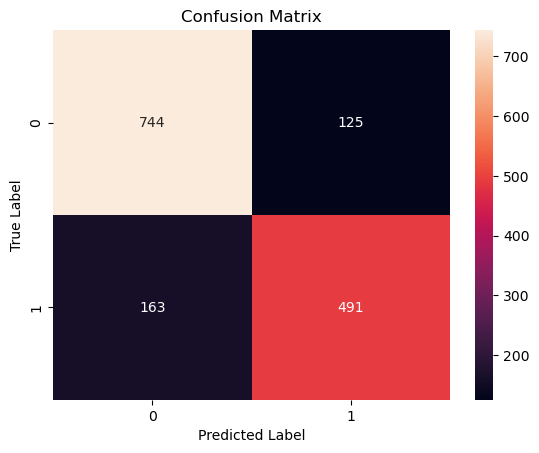

In [156]:
conf_mat = confusion_matrix(y_test,ypred)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [157]:
f1_score(y_test, ypred)

0.7732283464566929

LOGISTIC REGRESSION and TFIDF vectorizer

Using l1 regularization

In [158]:
C=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

clf = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)

clf.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [159]:
print(clf.best_estimator_)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [160]:
lor=LogisticRegression(penalty='l1',C=100,solver='liblinear')
lor.fit(X_train_tfidf, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
ypred = lor.predict(X_test_tfidf)

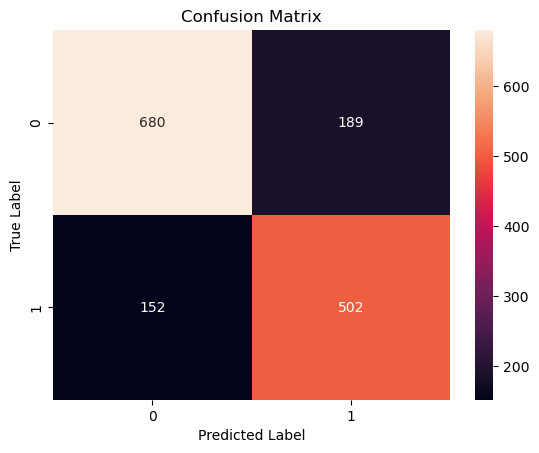

In [162]:
conf_mat = confusion_matrix(y_test,ypred)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [163]:
f1_score(y_test, ypred)

0.7464684014869888

### Using l2 regluarization

In [179]:
scalar = StandardScaler(with_mean=False)
X_train_tfidf = scalar.fit_transform(X_train_tfidf)
X_test_tfidf= scalar.transform(X_test_tfidf)

In [165]:
C=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

clf = GridSearchCV(LogisticRegression(penalty='l2'), tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
clf.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [166]:
print(clf.best_estimator_)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [167]:
lor=LogisticRegression(penalty='l2',C=0.0001)
lor.fit(X_train_tfidf, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
ypred = lor.predict(X_test_tfidf)

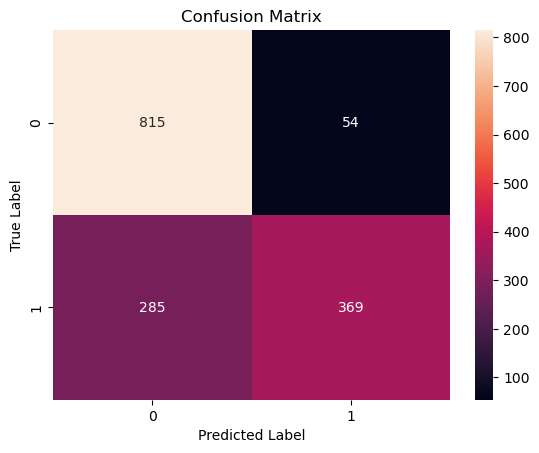

In [169]:
conf_mat = confusion_matrix(y_test,ypred)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [170]:
f1_score(y_test, ypred)

0.6852367688022285

### SVM WITH TFIDF

In [186]:
alpha=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters = [{'alpha': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
clf = GridSearchCV(SGDClassifier(loss='hinge'), tuned_parameters, scoring = 'roc_auc', cv=3,return_train_score=True)
clf.fit(X_train_tfidf, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [187]:
print(clf.best_estimator_)

SGDClassifier(alpha=10000, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [189]:
sg=SGDClassifier(alpha=10000,loss='hinge')
sgd =sg.fit(X_train_tfidf, y_train)

In [190]:
ypred = sgd.predict(X_test_tfidf)

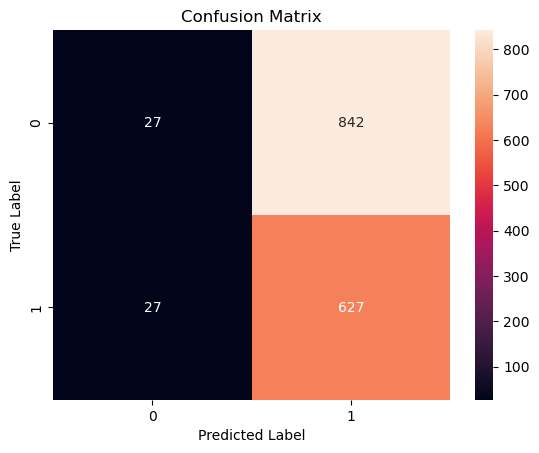

In [191]:
conf_mat = confusion_matrix(y_test,ypred)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [192]:
f1_score(y_test, ypred)

0.5906735751295337

In [1]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Algorthim", "F1-Score"]
x.add_row(["BOW","Naive Bayes",0.7373])
x.add_row(["BOW","Logistic Regression L1",0.7464])
x.add_row(["BOW","Logistic Regression L2",0.6558])
x.add_row(["BOW","SVM",0.7097])
x.add_row(["TFIDF","Naive Bayes",0.7732])
x.add_row(["TFIDF","Logistic Regression L1",0.7464])
x.add_row(["TFIDF","Logistic Regression L2",0.6852])
x.add_row(["TFIDF","SVM",0.5906])
print(x)

+------------+------------------------+----------+
| Vectorizer |       Algorthim        | F1-Score |
+------------+------------------------+----------+
|    BOW     |      Naive Bayes       |  0.7373  |
|    BOW     | Logistic Regression L1 |  0.7464  |
|    BOW     | Logistic Regression L2 |  0.6558  |
|    BOW     |          SVM           |  0.7097  |
|   TFIDF    |      Naive Bayes       |  0.7732  |
|   TFIDF    | Logistic Regression L1 |  0.7464  |
|   TFIDF    | Logistic Regression L2 |  0.6852  |
|   TFIDF    |          SVM           |  0.5906  |
+------------+------------------------+----------+


# roberta

In [193]:
Y = df_train_2['target'].values

In [236]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_tweets, Y, stratify=df_train_2['target'], test_size=0.20) 

In [ ]:
#INPUT IS TAKEN AS DICTIONARY AND 

In [220]:
X_train, X_test, y_train, y_test = train_test_split(df_train_2['text'],df_train_2['target'], stratify=df_train_2['target'],test_size=0.2)


In [209]:
from transformers import AutoTokenizer

In [221]:
tokenizer = AutoTokenizer.from_pretrained("roberta-base") #Tokenizer
train_inputs = tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors='tf') #Tokenized text
train_labels = y_train
test_inputs = tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors='tf') #Tokenized text
test_labels = y_test

In [218]:
from transformers import AutoConfig, TFAutoModelForSequenceClassification
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

## CAN I USE THIS FUNCTION AFTER GIVING SOURCE ??

In [233]:
#Source :==>>> https://www.analyticsvidhya.com/blog/2022/09/real-or-not-disaster-tweets-classification-with-roberta/
class LossOnHistoryRobert(tf.keras.callbacks.Callback):

    def __init__(self,x_val,y_val):

        self.x_val = x_val

        self.y_val = y_val

    def on_train_begin(self, logs={}):

        self.history={'loss': [],'accuracy': [],'val_loss': [],'val_accuracy': [],'val_f1': []}

    def on_epoch_end(self, epoch, logs={}):  

        true_positives=0

        self.history['loss'].append(logs.get('loss'))

        self.history['accuracy'].append(logs.get('accuracy'))

        if logs.get('val_loss', -1) != -1:

            self.history['val_loss'].append(logs.get('val_loss'))

        if logs.get('val_accuracy', -1) != -1:

            self.history['val_accuracy'].append(logs.get('val_accuracy'))

        #y_pred gives us the probability value 

        y_pred= self.model.predict(self.x_val)

        y_pred = np.argmax(np.array(y_pred.logits),axis=1)

        #The micro_f1 score

        f1 = f1_score(self.y_val.values, y_pred)

	#confusion_matrix

        print('F1_Score: ',f1)

In [228]:
model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=2)


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [229]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [230]:
history_own=LossOnHistoryRobert(dict(test_inputs),test_labels) 
history=model.fit(dict(train_inputs),train_labels, validation_data=[dict(test_inputs),test_labels], batch_size=32,epochs=1, verbose=1, callbacks=history_own)

48/48 [==============================] - 131s 3s/step
F1_Score:  0.7716666666666667
191/191 [==============================] - 1677s 9s/step - loss: 0.7135 - val_loss: 0.4764


In [238]:
model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [239]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [240]:
history=model.fit(dict(train_inputs),train_labels, validation_data=[dict(test_inputs),test_labels], batch_size=32,epochs=1, verbose=1)

191/191 [==============================] - 2423s 13s/step - loss: 0.8146 - val_loss: 0.6931


In [234]:
from transformers import TextClassificationPipeline

model = model
tokenizer = AutoTokenizer.from_pretrained("roberta-base")
pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True)

## Can use this fuction for Final function

In [237]:
pipe(X_test) 


KeyboardInterrupt

